In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
################### Importing Libraries ######################
import os
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats
import seaborn as sns
url='https://raw.githubusercontent.com/maheesh007/project_ds203/main/train.csv'
response = requests.get(url)

raw_data = response.content.decode('utf-8')
raw_data = raw_data.split("\n")


with open('train.csv', 'w') as file:
  for row in raw_data:
    file.write(row+"\n")
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


>We check for duplicate entries

In [ ]:
df.duplicated().any()

False

We have no duplicate entries in our dataframe

>Clearly the column Loan_ID is redundant so we drop it from our dataframe

In [ ]:
df = df.drop(columns = ["Loan_ID"])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


>We analyse the number of records and the number of columns in our dataframe

In [ ]:
(rows,cols) = df.shape
print(f"The number of records is: {rows}" )
print(f"The number of varibables is: {cols}" )

The number of records is: 614
The number of varibables is: 12


>We analyse the data types of the columns in our dataframe




 

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

>  We now print the unique values in each column using pd.unique().
Notice that the number of unique values for discrete variables are less which makes sense

In [ ]:
for column in df.columns:
  unique_values = len(pd.unique(df[column]))
  print(f"The number of unique entries in {column} is {unique_values}")

The number of unique entries in Gender is 3
The number of unique entries in Married is 3
The number of unique entries in Dependents is 5
The number of unique entries in Education is 2
The number of unique entries in Self_Employed is 3
The number of unique entries in ApplicantIncome is 505
The number of unique entries in CoapplicantIncome is 287
The number of unique entries in LoanAmount is 204
The number of unique entries in Loan_Amount_Term is 11
The number of unique entries in Credit_History is 3
The number of unique entries in Property_Area is 3
The number of unique entries in Loan_Status is 2


>We now print a summary of our variables along with their data categorisation

In [ ]:
type = ["D","D","D","D","D","C","C","C","D","D","D","D"]
data = ["Categorical","Categorical","Ordinal","Categorical","Categorical","Continuous(Int)","Continuous(Float)","Continuous(Float)","Ordinal","Categorical","Categorical","Categorical"]
columns = df.columns
database = [[columns[i],type[i],data[i]] for i in range(0,12)]
db = pd.DataFrame(database, columns = ["Variable Name","Discrete/Continuous","Category"] )
db

,Variable Name,Discrete/Continuous,Category
0,Gender,D,Categorical
1,Married,D,Categorical
2,Dependents,D,Ordinal
3,Education,D,Categorical
4,Self_Employed,D,Categorical
5,ApplicantIncome,C,Continuous(Int)
6,CoapplicantIncome,C,Continuous(Float)
7,LoanAmount,C,Continuous(Float)
8,Loan_Amount_Term,D,Ordinal
9,Credit_History,D,Categorical


In [ ]:
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print('Categorical:',categorical)
cont = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print('Continuous:',cont)

Categorical: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
Continuous: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


>Describing Categorical data

In [ ]:
df.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


> We look at the number of NaN values (missing entries) in each column.

In [ ]:
i = 1
for column in df.columns:
  na_values = sum(pd.isna(df[column]))
  print(f"{i}) The number of NaN entries in {column} is {na_values}")
  i += 1

1) The number of NaN entries in Gender is 13
2) The number of NaN entries in Married is 3
3) The number of NaN entries in Dependents is 15
4) The number of NaN entries in Education is 0
5) The number of NaN entries in Self_Employed is 32
6) The number of NaN entries in ApplicantIncome is 0
7) The number of NaN entries in CoapplicantIncome is 0
8) The number of NaN entries in LoanAmount is 22
9) The number of NaN entries in Loan_Amount_Term is 14
10) The number of NaN entries in Credit_History is 50
11) The number of NaN entries in Property_Area is 0
12) The number of NaN entries in Loan_Status is 0


In [ ]:
i = 0
for index, row in df.iterrows():
    na_values = sum(pd.isna(row))
    if na_values == 0:
      i += 1
print(f"The number of records having no missing values is {i}")


The number of records having no missing values is 480


#Univariate Analysis
###We plot bar graphs and pie charts for the different variables and derive some useful insights from them
>First we do this for categorical variables

<Figure size 432x288 with 0 Axes>

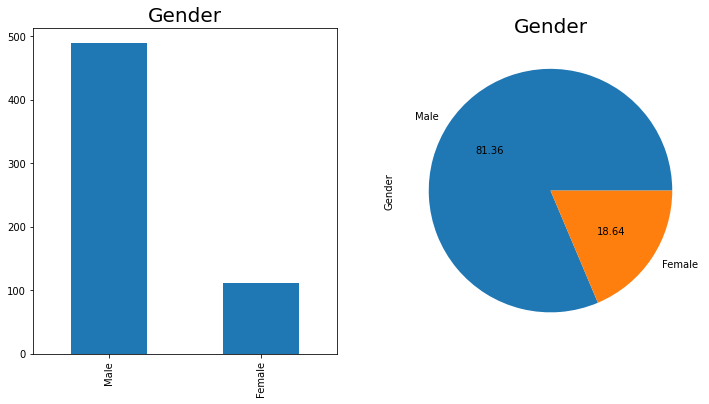

<Figure size 432x288 with 0 Axes>

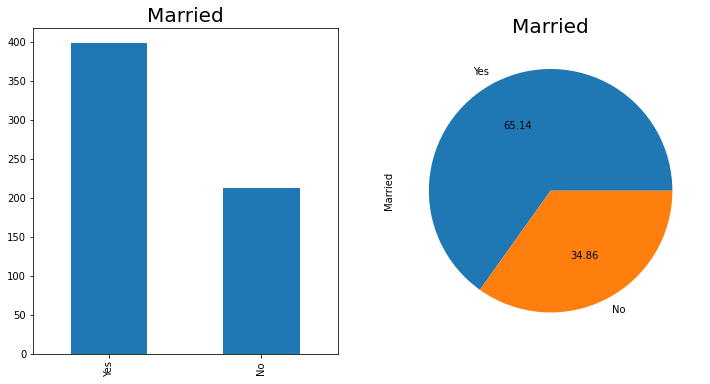

<Figure size 432x288 with 0 Axes>

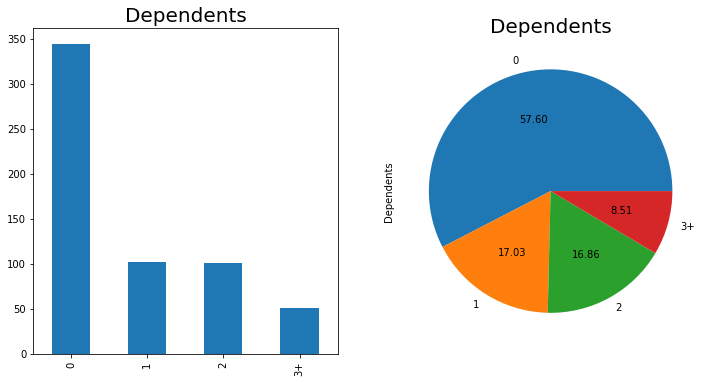

<Figure size 432x288 with 0 Axes>

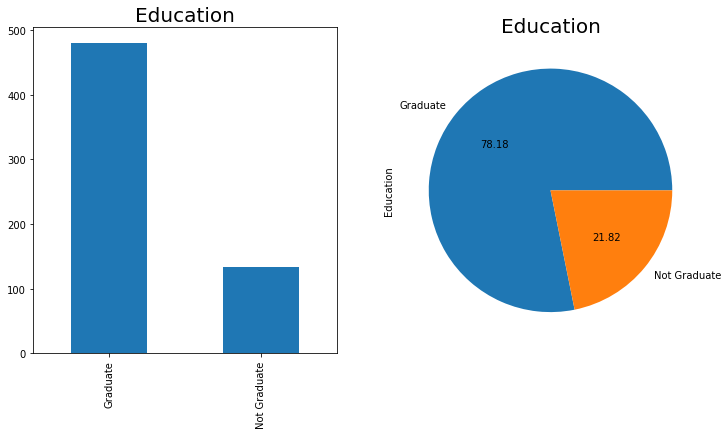

<Figure size 432x288 with 0 Axes>

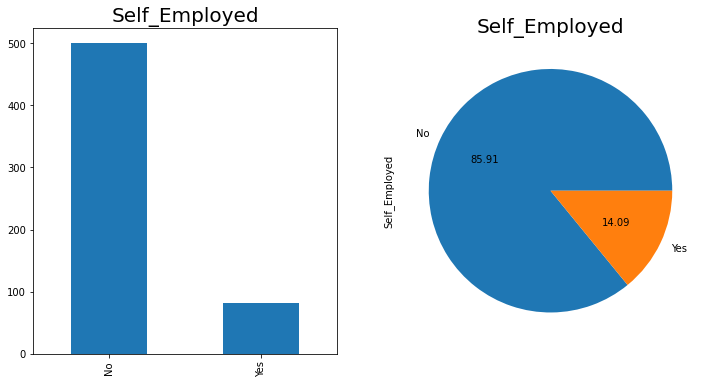

<Figure size 432x288 with 0 Axes>

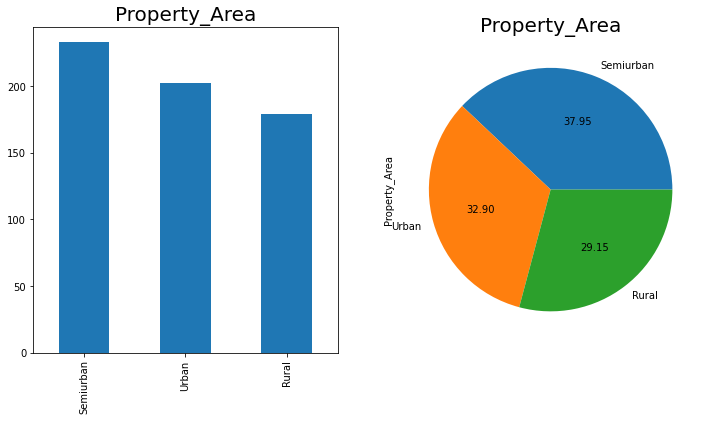

<Figure size 432x288 with 0 Axes>

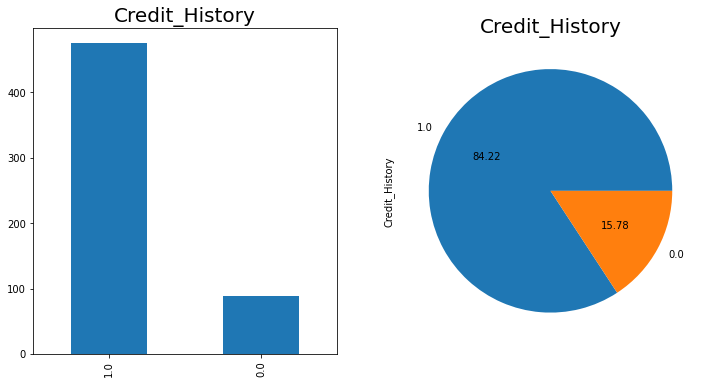

<Figure size 432x288 with 0 Axes>

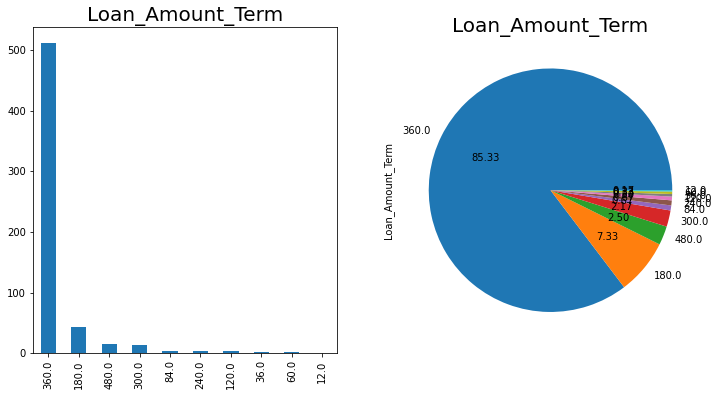

In [ ]:
for col in categorical:
  plt.figure(1)
  fig = plt.subplots(figsize=(12,6));
  plt.subplot(121);
  df[col].value_counts().plot.bar();
  plt.title(col,fontsize=20);

  plt.subplot(122);
  df[col].value_counts().plot.pie(autopct='%.2f');
  plt.title(col,fontsize=20)
  plt.show();

##Insights from categorical variables
>Gender: A vast majority of the loan applicants (81%) are males

>Marital Status: Majority of the applicants are married (65%)

>Number of dependents: Majority of them have 0 dependents (57.60%) while others have either 1(17.3%), 2(16.86%) or more than 3 dependents(8.51%)

>Education: Most of the applicants are graduates (78%)

>Self-employed: Majority of them are not self employed (86%)

>Property Area: There is approximately even spread of people living in urban, semi-urban or rural areas with majority living in semi-urban region

>Credit History: Most of the applicants (84%) have a good credit history meaning most have repaid their earlier loans

>Loan Amount Term: A vast majority of the people(85%) apply for a loan of 360 months term.


##Univariate Analysis for numerical variables:

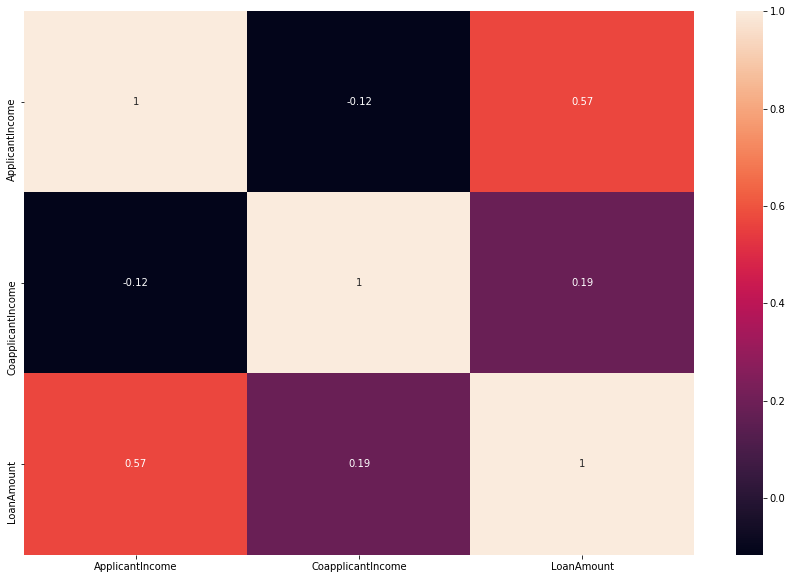

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[cont].corr(),annot=True)

The above correlation matrix tells us that applicant income and loan amount are pretty much correlated which is a logical observation

Now we calculate the quartiles, mean, variance, skew and interquartile range (Q3 - Q1)

In [ ]:
cont=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for column in cont:
    print(f"The quartile range of {column} is : \n{df[column].quantile([0.,.25,.5,.75,1.])}")
    print(f"The mean is :{df[column].mean()}")
    print(f"The variance is :{df[column].var()}")
    print(f"The skew is :{df[column].skew()}")
    inter_quartile = df[column].quantile([0.,.25,.5,.75,1.]).iloc[3] - df[column].quantile([0.,.25,.5,.75,1.]).iloc[1]
                                                                                                                   
    print(f"The inter quartile range of {column} is: {inter_quartile}")
    print("\n")

The quartile range of ApplicantIncome is : 
0.00      150.0
0.25     2877.5
0.50     3812.5
0.75     5795.0
1.00    81000.0
Name: ApplicantIncome, dtype: float64
The mean is :5403.459283387622
The variance is :37320390.167181164
The skew is :6.539513113994625
The inter quartile range of ApplicantIncome is: 2917.5


The quartile range of CoapplicantIncome is : 
0.00        0.00
0.25        0.00
0.50     1188.50
0.75     2297.25
1.00    41667.00
Name: CoapplicantIncome, dtype: float64
The mean is :1621.245798027101
The variance is :8562929.518387241
The skew is :7.491531216657306
The inter quartile range of CoapplicantIncome is: 2297.25


The quartile range of LoanAmount is : 
0.00      9.0
0.25    100.0
0.50    128.0
0.75    168.0
1.00    700.0
Name: LoanAmount, dtype: float64
The mean is :146.41216216216216
The variance is :7325.190241002424
The skew is :2.677551679256059
The inter quartile range of LoanAmount is: 68.0




>Plotting distribution of numerical variables

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


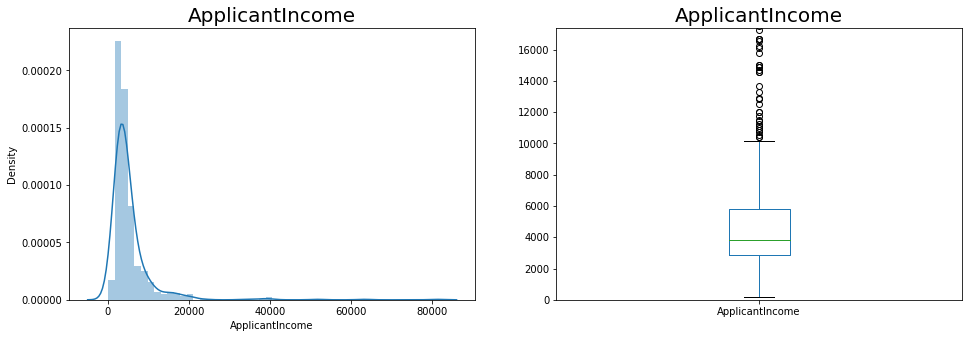

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


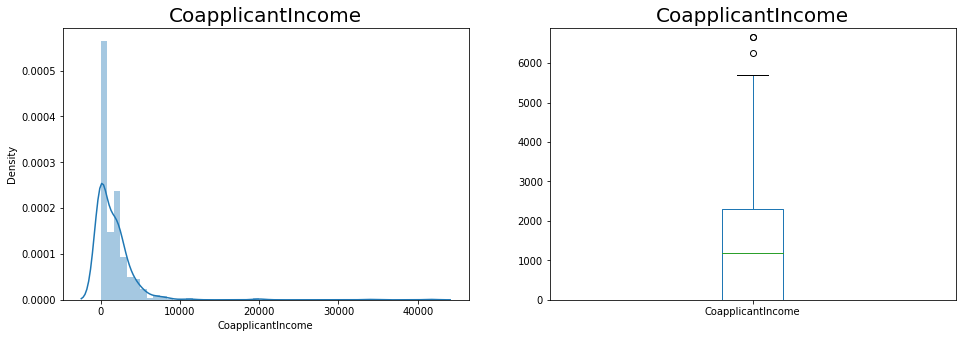

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


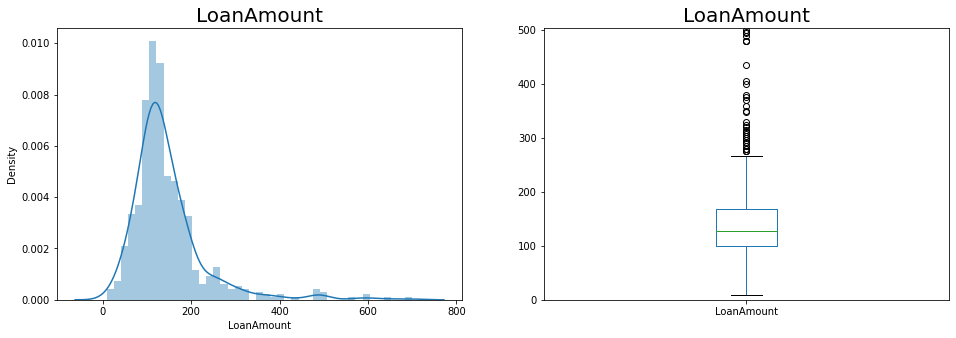

In [ ]:

for col in cont:
  plt.figure(1)
  plt.subplot(121)
  sns.distplot(df[col]);
  plt.title(col,fontsize=20)

  plt.subplot(122)
  df[col].plot.box(figsize=(16,5))
  plt.ylim(0,3*df[col].quantile([0.,.25,.5,.75,1.]).iloc[3])
  plt.title(col,fontsize=20)
  plt.show();

The above plots indicate the following things:

1) The three numerical variables ,i.e, 'Applicant Income' ,'Coapplicant Income' and 'Loan Amount' are positively skewed - This means the mode of the data arrives much before the median of the data.

2)In all these variables, the mean of the data is higher than 50th percentile (2nd quartile) ,i.e, the median of the data. This again indicates that the peak of the curve is achieved very early on.

3) The inter-quartile range tells us where the majority of samples are present

4) The applicant income is much higher than coapplicant income

5)The difference between quartiles keeps on increasing indicating the samples keep spreading out more

6) In addition we can also see that there are many outliers in all these variables


Next we check if the continuous variables are normally distributed or lognormally distributed

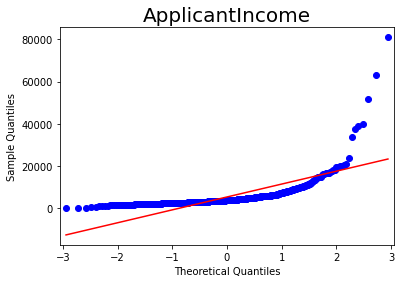

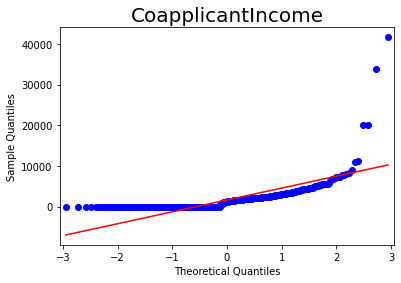

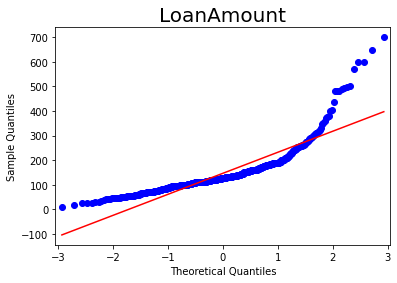

In [ ]:
import statsmodels.api as sm
for i in cont:
  sm.qqplot(df[i].dropna(),line='s')
  plt.title(i,fontsize=20)

We plot the QQ plots of the variables. QQ plots are plots betweeen the sample quantiles and the quantiles of normal distribution. The blue plot indicates the samples and we have also plotted the normal distribution in red. If the blue plot follows the red line, then we infer that the samples are normally distributed. 

All the variables are right skewed since the QQ plots are curved upwards

Checking for log normal distribution

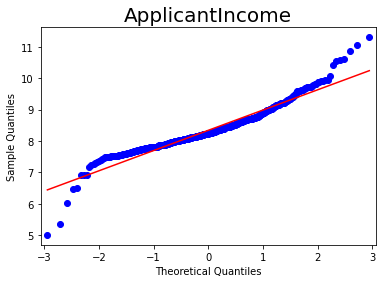

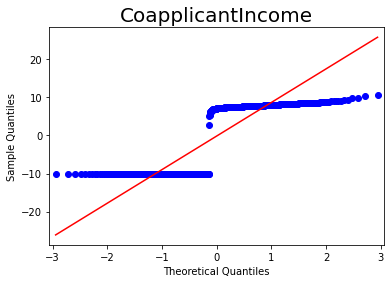

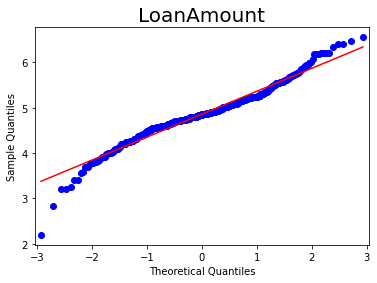

In [ ]:
df_log = df[(df[cont] != 0).all(axis=1)]
epsilon = np.exp(-10)

for j in cont:
    sm.qqplot(np.log(df[j].dropna()+epsilon),line = "s")
    plt.title(j,fontsize=20)

Deviation from log normal, we add a small epsilon so that zero values dont give an error. The red line is the reference standardised line
Coapplicant income devaiates from the red line whereas applicant income and loan amount are pretty much log normal

#Pairwise Analysis

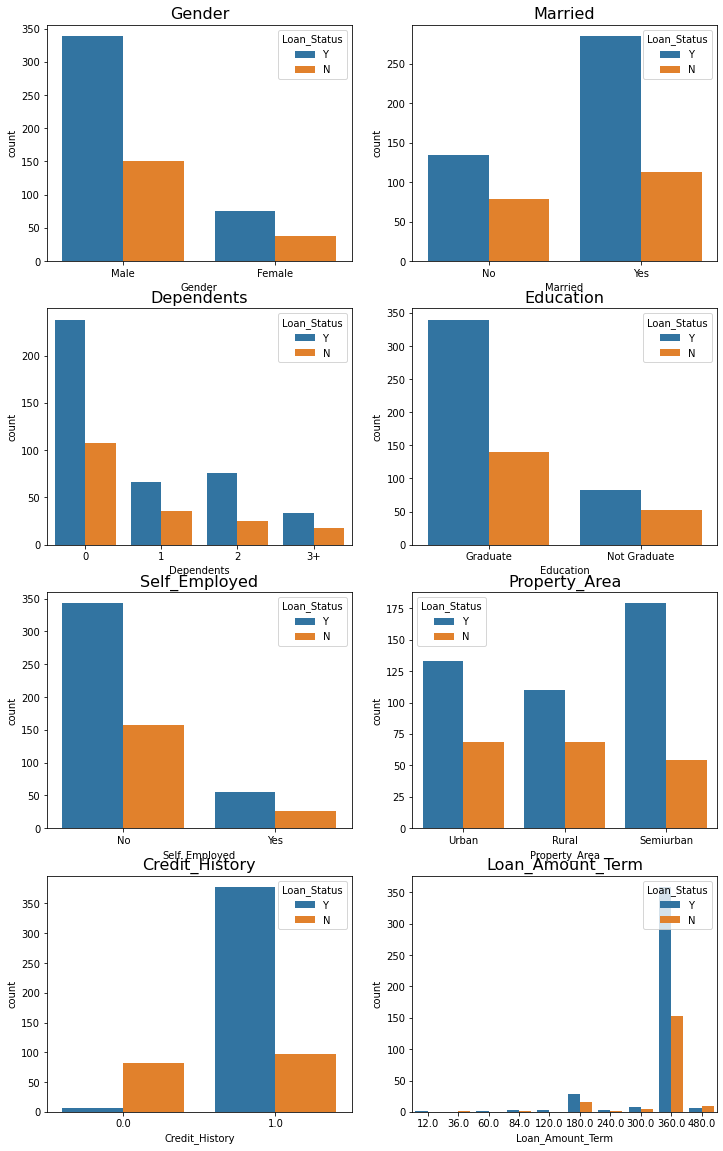

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes = plt.subplots(4,2,figsize=(12,20))
for id,cat in enumerate(categorical):
    row=id//2
    col =id%2
    sns.countplot(x=cat,data=df,hue='Loan_Status',ax=axes[row,col]).set_title(cat,fontsize=16)

>People from semi urban area are more likely to get their loan approved whereas people from rural areas have much less chance of approval as compared to others

>People having a good credit history ,i.e, those who have repaid their earlier loans have a good chance to get their loans approved whereas those without credit history almost never get approval for their loan   

>People having 2 dependents have higher chance of getting their loan approved but this result might be because of insufficient data

>Graduates are more likely to get their loan approved as compared to non-graduates

>These results have been further proved by the following 4 plots

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


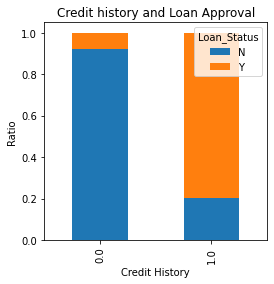

In [ ]:
print(pd.crosstab(df["Credit_History"],df["Loan_Status"]))
CreditHistory = pd.crosstab(df["Credit_History"],df["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit History")
plt.ylabel("Ratio")
plt.title('Credit history and Loan Approval')
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


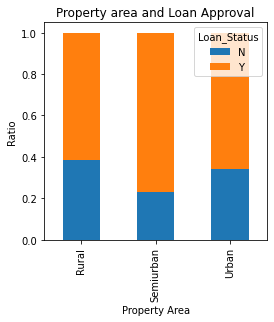

In [ ]:
print(pd.crosstab(df["Property_Area"],df["Loan_Status"]))
CreditHistory = pd.crosstab(df["Property_Area"],df["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property Area")
plt.ylabel("Ratio")
plt.title('Property area and Loan Approval')
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


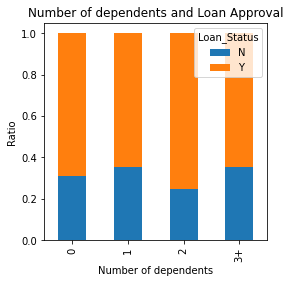

In [ ]:
print(pd.crosstab(df["Dependents"],df["Loan_Status"]))
CreditHistory = pd.crosstab(df["Dependents"],df["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Number of dependents")
plt.ylabel("Ratio")
plt.title('Number of dependents and Loan Approval')
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


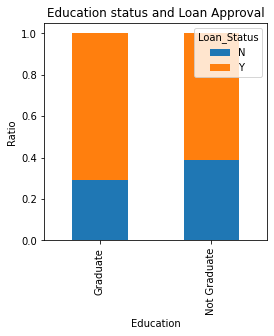

In [ ]:
print(pd.crosstab(df["Education"],df["Loan_Status"]))
CreditHistory = pd.crosstab(df["Education"],df["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.title('Education status and Loan Approval')
plt.xlabel("Education")
plt.ylabel("Ratio")
plt.show()

<Figure size 1080x720 with 0 Axes>

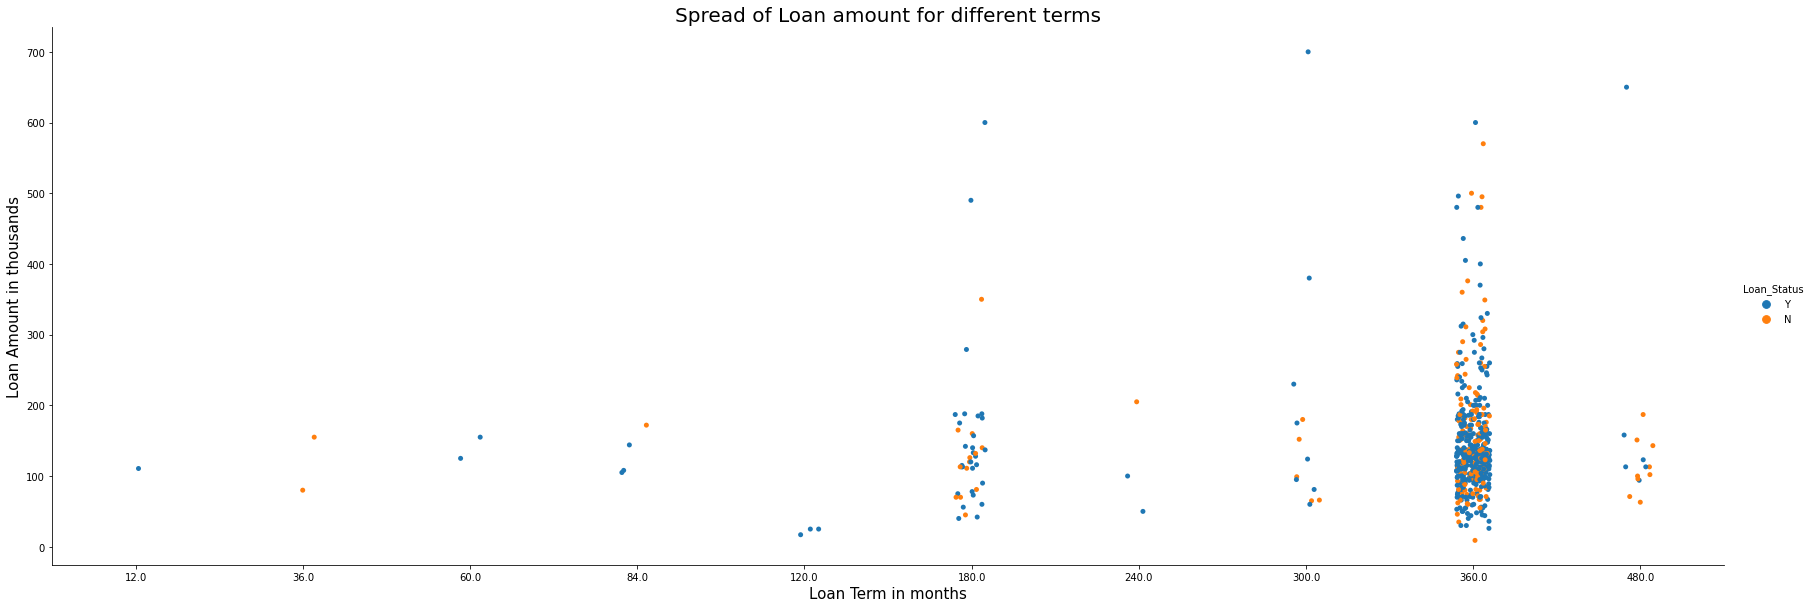

In [ ]:
plt.figure(figsize = (15,10));
sns.catplot(x="Loan_Amount_Term", y="LoanAmount",hue='Loan_Status' ,height = 8, aspect=3 ,data=df);
plt.xlabel('Loan Term in months',fontsize=15)
plt.ylabel('Loan Amount in thousands',fontsize=15)
plt.title('Spread of Loan amount for different terms',fontsize=20)
plt.show()

The above cat-plot tells us that people have applied for short term loans of small amounts only. For large loan amounts, they have applied for 360 months mostly

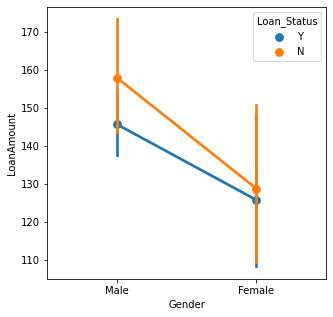

In [ ]:
plt.figure(figsize = (5,5))
sns.pointplot(x="Gender", y="LoanAmount", hue="Loan_Status", kind="point",data=df)
plt.show()

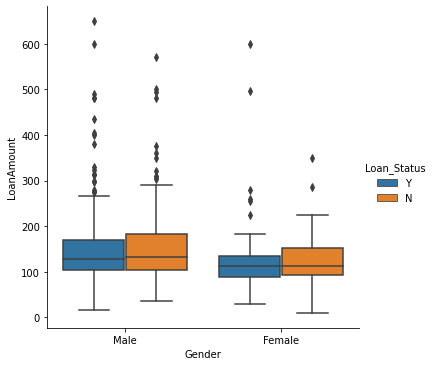

In [ ]:
sns.catplot(x="Gender", y="LoanAmount", hue='Loan_Status',kind='box',data=df)
plt.show()

The boxplot and pointplot above show that on an average, men have applied for higher amounts of loan as compared to women.
Men have higher average approved loan amounts.
Also there are many more outliers in case of men as compared to women

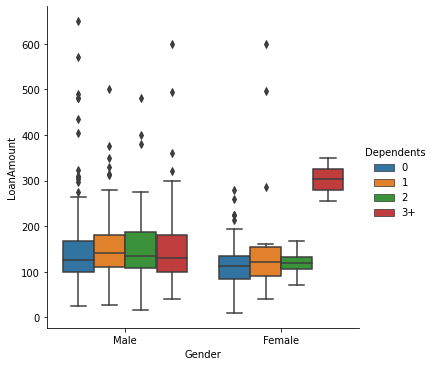

In [ ]:
sns.catplot(x="Gender", y="LoanAmount", hue='Dependents',kind='box',data=df)
plt.show()

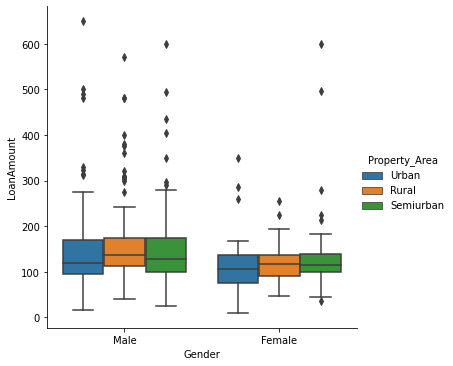

In [ ]:
sns.catplot(x="Gender", y="LoanAmount", hue='Property_Area',kind='box',data=df)
plt.show()

From the above plots, we come to know that on an average, men apply for higher amount of loan as compared to women and their loan amount is much more spread than that for females. Also their are more outliers in the case of males

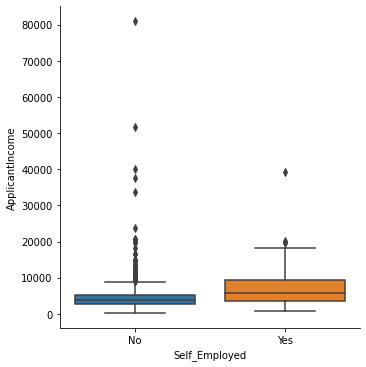

In [ ]:
sns.catplot(x="Self_Employed", y="ApplicantIncome",kind='box',data=df)
plt.show()

Self employed people have higher annual income on an average and also their annual income is spread more widely whereas the other group has more outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

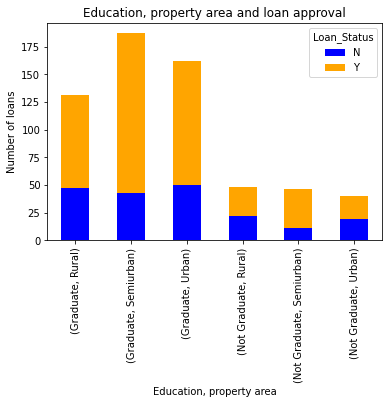

In [ ]:
import pandas as pd
from google.colab import files
var=pd.crosstab(index=[df['Education'],df['Property_Area']],columns=df['Loan_Status'])
var.plot(kind='bar',stacked='true',color=['blue','orange'],grid=False)
plt.xlabel('Education, property area')
plt.ylabel('Number of loans')
plt.title('Education, property area and loan approval')
plt.savefig('f1.png')
files.download('f1.png')
plt.show()

Non-graduates in semi-urban areas are much more likely to get their loan approved as compared to non graduates in other areas
Graduates in semi-urban areas have the highest probability to get their loan approved as compared to other areas

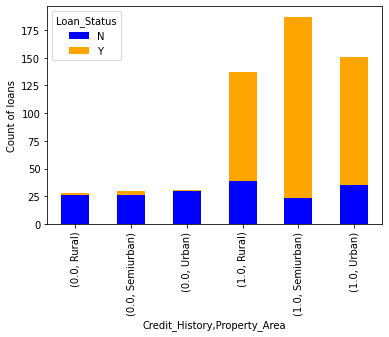

In [ ]:
import pandas as pd
var=pd.crosstab(index=[df['Credit_History'],df['Property_Area']],columns=df['Loan_Status'])
var.plot(kind='bar',stacked='true',color=['blue','orange'],grid=False)
plt.ylabel('Count of loans')
plt.show()

People living in the semi urban regions and having a good credit have a very good chance of getting their loan approved.
This is consistent with what we found earlier

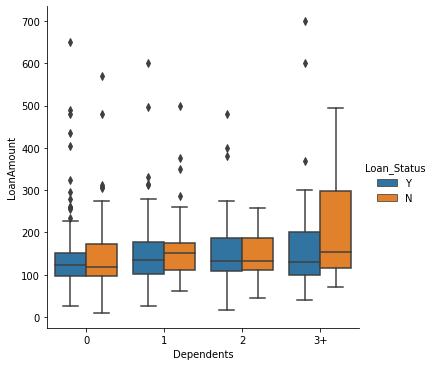

In [ ]:
sns.catplot(x="Dependents", y='LoanAmount', hue='Loan_Status',kind='box',data=df)
plt.show()

From the above plot we can conclude that people having no dependents apply for loan in a very short range and as the number of dependents increase, the spread of loan amount also increases

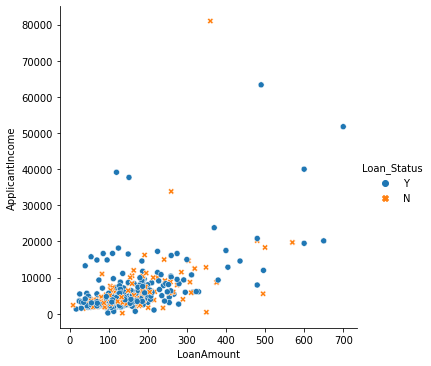

In [ ]:
sns.relplot(x="LoanAmount", y="ApplicantIncome", hue="Loan_Status",style='Loan_Status', data=df);

From the above plot, it is evident that higher loan amounts get approved when applicant income is high

Now let us create a new column named 'income/person' which basically contains (applicant income + coapplicant income)/(Number of dependents+1)

In [ ]:
i=[]
for d in range(len(df['Dependents'])):
  if df['Dependents'][d] =='1':
    i.append(2)
  elif df['Dependents'][d] =='2':  
    i.append(3)
  elif df['Dependents'][d] =='3':
    i.append(4)
  elif df['Dependents'][d] =='3+':
    i.append(5)
  else:
    i.append(1)
df["Income/person"] = (df["ApplicantIncome"]+df['CoapplicantIncome'])/i # To make the units equal we multiply with 1000
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income/person
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,3045.5
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


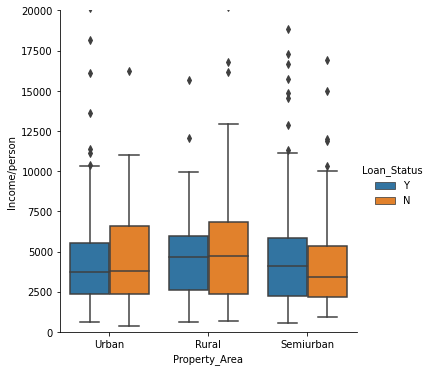

In [ ]:
sns.catplot(x="Property_Area", y="Income/person", hue='Loan_Status',kind='box',data=df)
plt.ylim(0,20000)
plt.show()
# In the semi-urban region, there is a significant difference between the average income per person of those people whose loan gets approved and those whose loans don't get approved.
# So, in the semi-urban region there are higher chances of loan approval if one has higher income per person in the family. 

Distribution of Income per person

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income per person')

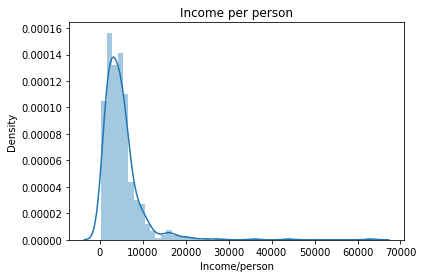

In [ ]:
sns.distplot(df['Income/person']);
plt.title('Income per person')

Checking for lognormal distribution

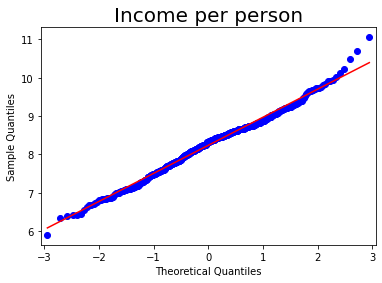

In [ ]:
sm.qqplot(np.log(df['Income/person'].dropna()+epsilon),line = "s")
plt.title('Income per person',fontsize=20)
plt.show()

Income per person is pretty much log normal

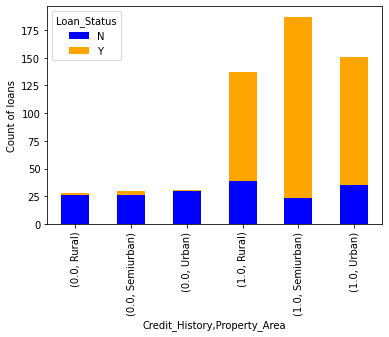

In [ ]:
import pandas as pd
var=pd.crosstab(index=[df['Credit_History'],df['Property_Area']],columns=df['Loan_Status'])
var.plot(kind='bar',stacked='true',color=['blue','orange'],grid=False)
plt.ylabel('Count of loans')
plt.show()

People living in suburban areas and having good credit history are more likely to get their loan approved as compared to those having good credit history in other areas.